In [3]:
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV

In [4]:
red_RGB = (1, 0, 0)
blue_RGB = (0, 0, 1)
data_colors = [red_RGB, blue_RGB]

def read_points_file(filename):
    points = []
    with open(filename, "r") as f:
        for point in f:
            point = point.strip("\n").split()
            points.append([float(point[0]), float(point[1])])
    return points

def read_data(class_0_file, class_1_file):
    points_label0 = read_points_file(class_0_file)
    points_label1 = read_points_file(class_1_file)
    points = points_label0 + points_label1
    points = np.array(points)
    
    label0, label1 = [0], [1]
    num_of_label0, num_of_label1 = len(points_label0), len(points_label1)
    labels = label0 * num_of_label0 + label1 * num_of_label1
    
    return (points, labels)


def plot_data(X_train, y_train, X_test, y_test):
  
    X = np.concatenate((X_train, X_test))
    y = np.concatenate((y_train, y_test))

    colors = get_colors(y)
    colors_train = get_colors(y_train)
    colors_test = get_colors(y_test)

    plt.figure(figsize=(12, 4), dpi=150)

    # Plot all data plot
    plt.subplot(131)
    plt.axis('equal')
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=10, edgecolors=colors)
    plt.title("Data (100%)")


    # training data plot
    plt.subplot(132)
    plt.axis('equal')
    #plt.axis('off')
    plt.scatter(X_train[:, 0], X_train[:, 1], c = colors_train, s = 10, edgecolors=colors_train)
    plt.title("Training Data (80%)")

    # testing data plot
    plt.subplot(133)
    plt.axis('equal')
    #plt.axis('off')
    plt.scatter(X_test[:, 0], X_test[:, 1], c = colors_test, s = 10, edgecolors=colors_test)
    plt.title("Test Data (20%)")
    plt.tight_layout()
    plt.show()

def get_colors(y):
    return [data_colors[label] for label in y]

def plot_decision_function(X_train, y_train, X_test, y_test, clf):
    plt.figure(figsize=(8, 4), dpi=150)
    plt.subplot(121)
    plt.title("Training data")
    plot_decision_function_helper(X_train, y_train, clf)
    plt.subplot(122)
    plt.title("Test data")
    plot_decision_function_helper(X_test, y_test, clf, True)
    plt.show()


def plot_decision_function_helper(X, y, clf, show_only_decision_function = False):

    colors = get_colors(y)
    plt.axis('equal')
    plt.tight_layout()
    #plt.axis('off')

    plt.scatter(X[:, 0], X[:, 1], c=colors, s=10, edgecolors=colors)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T # xy.shape = (900, 2)
    Z = clf.decision_function(xy).reshape(XX.shape)
    # clf.decision_function(xy).shape = (900,)
    # Z.shape = (30, 30)

    if  show_only_decision_function:
    # Plot decision boundary
        ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
                 linestyles=['-'])
    else :
    # Plot decision boundary and margins
        ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                 linestyles=['--', '-', '--'])
    # Plot support vectors
    #ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 10,
    #         linewidth=1, facecolors='k', c = 'k', label='Support Vectors')

    #plt.legend(fontsize='small')

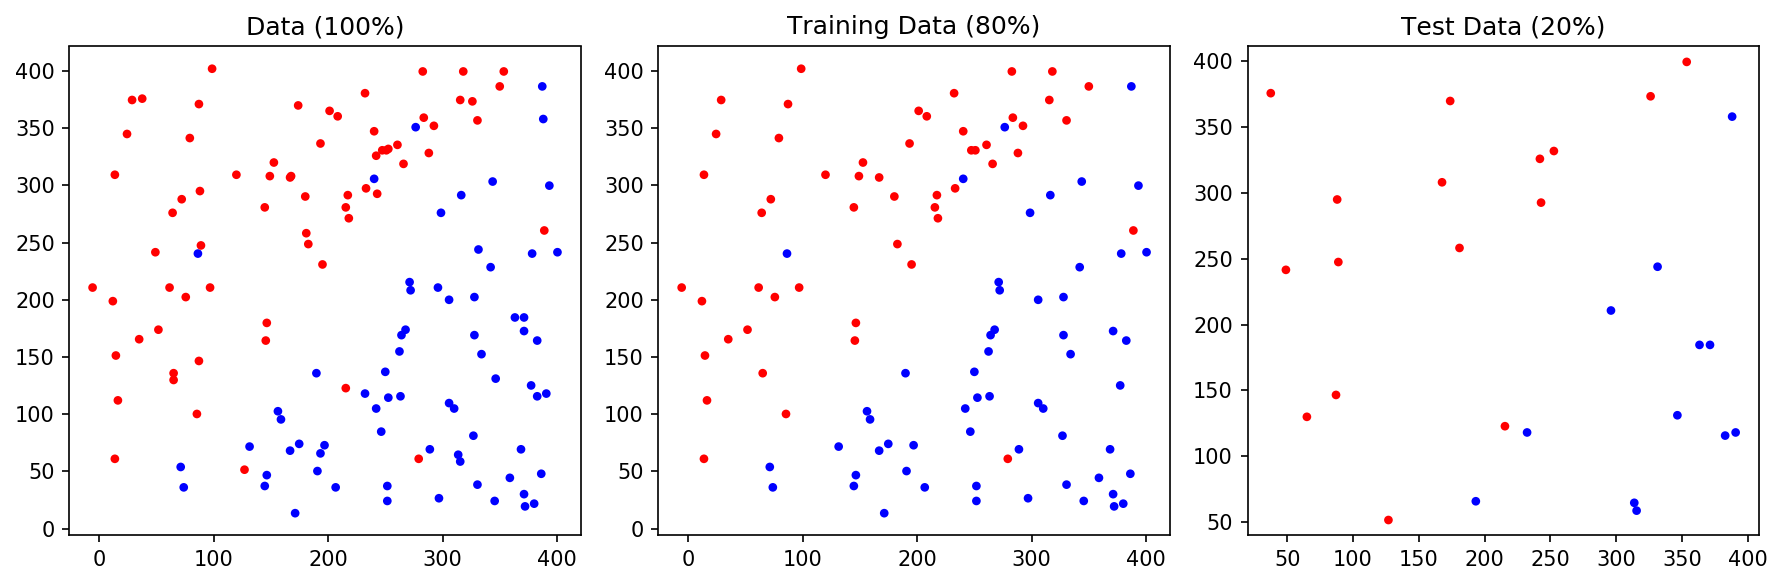

In [5]:
x, labels = read_data("points_class_0_noise.txt", "points_class_1_noise.txt")
X_train, X_test, y_train, y_test = train_test_split(x, labels, test_size = 0.2, random_state=0)

plot_data(X_train, y_train, X_test, y_test)

# svm.SVC()

- C(float, default=1.0) : Regularization parameter
- kernel ({‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’) : kernel function
- degree (int, default=3) : Degree of the polynomial kernel function (‘poly’)
- gamma ({‘scale’, ‘auto’} or float, default=’scale’) : Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’
- coef0 (float, default=0.0) : It is only significant in ‘poly’ and ‘sigmoid
- tol (float, default=1e-3) : Tolerance for stopping criterion
- class_weight (dict or ‘balanced’, default=None) : Set the parameter C of class i to class_weight[i]*C for SVC

### hard margin vs soft margin
- C : regularization term
- hard(C=1) vs soft(C=100)

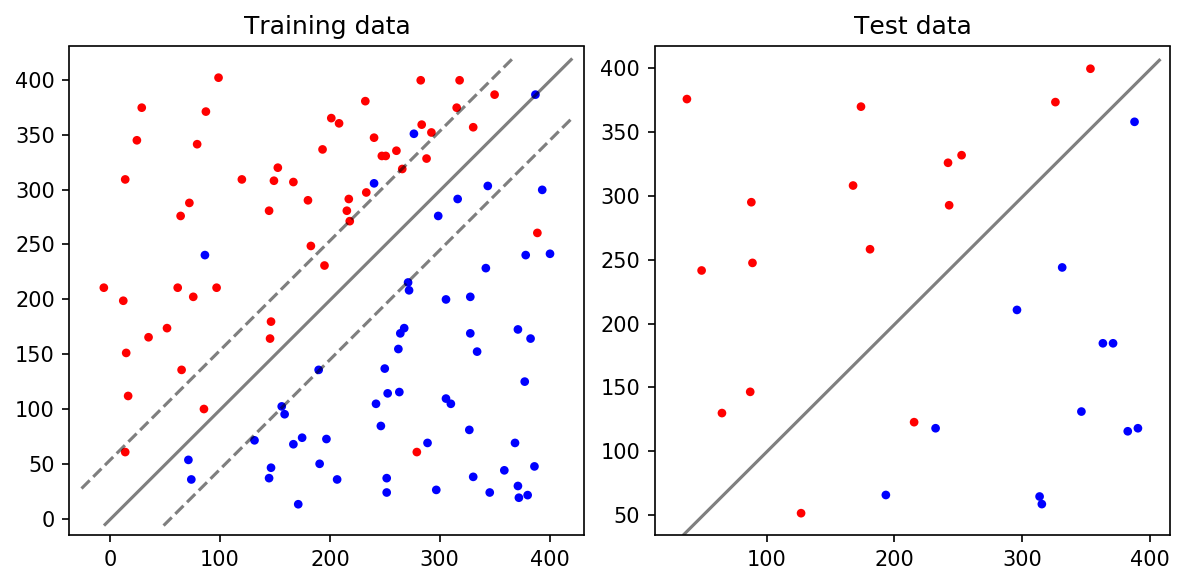

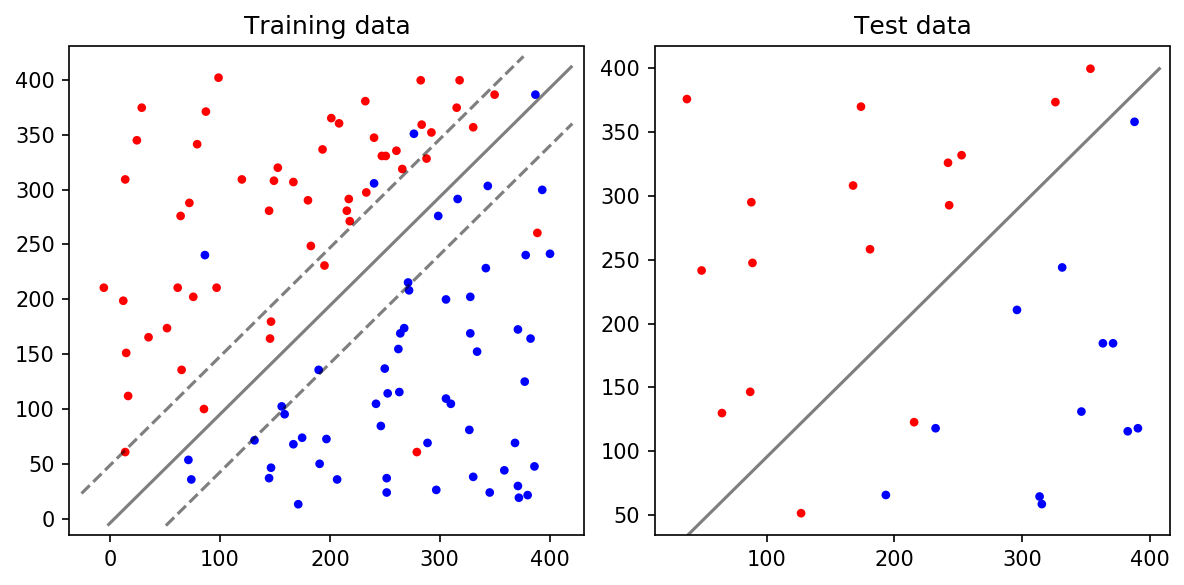

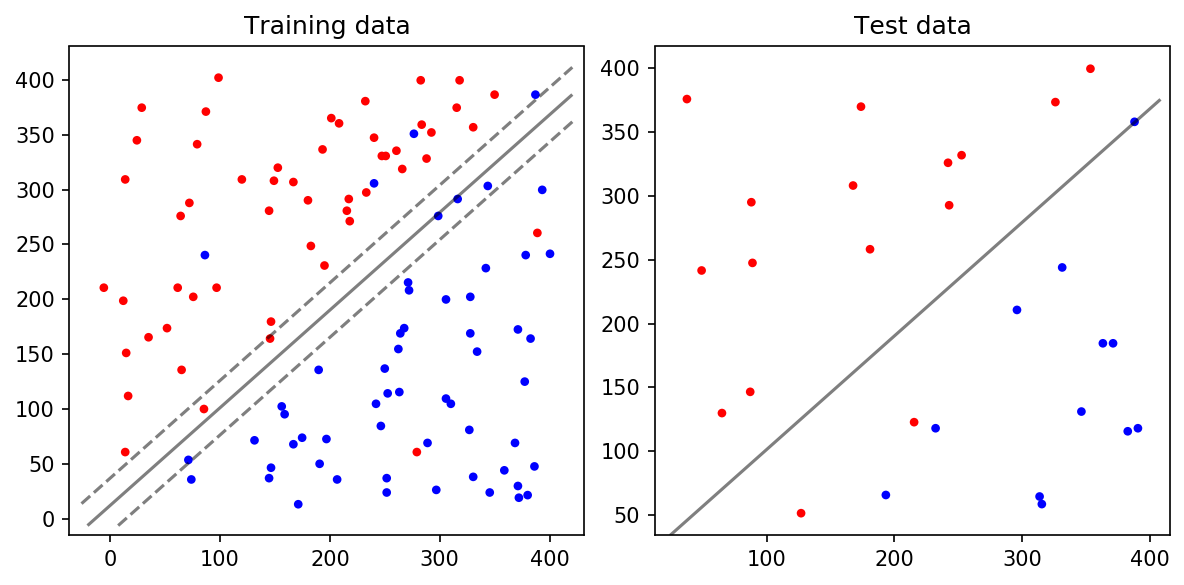

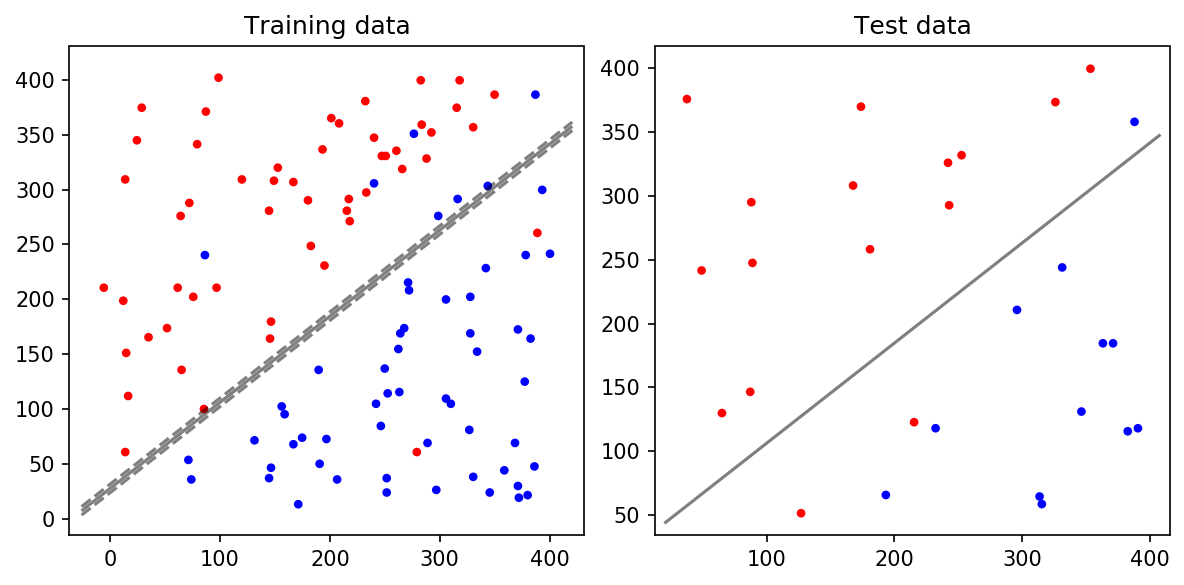

In [6]:
# C=1
clf_1 = svm.SVC(kernel='linear', C=1)
clf_1.fit(X_train, y_train)

plot_decision_function(X_train, y_train, X_test, y_test, clf_1)

# C=10
clf_10 = svm.SVC(kernel='linear', C=10)
clf_10.fit(X_train, y_train)

plot_decision_function(X_train, y_train, X_test, y_test, clf_10)

# C=100
clf_100 = svm.SVC(kernel='linear', C=100)
clf_100.fit(X_train, y_train)

plot_decision_function(X_train, y_train, X_test, y_test, clf_100)

# C=1000
clf_1000 = svm.SVC(kernel='linear', C=1000)
clf_1000.fit(X_train, y_train)

plot_decision_function(X_train, y_train, X_test, y_test, clf_1000)

In [7]:
print("Accuracy(C=1): {}%".format(round(clf_1.score(X_test, y_test) * 100 )))
print("Accuracy(C=10): {}%".format(round(clf_10.score(X_test, y_test) * 100 )))
print("Accuracy(C=100): {}%".format(round(clf_100.score(X_test, y_test) * 100 )))
print("Accuracy(C=1000): {}%".format(round(clf_1000.score(X_test, y_test) * 100 )))

Accuracy(C=1): 93.0%
Accuracy(C=10): 93.0%
Accuracy(C=100): 89.0%
Accuracy(C=1000): 89.0%


C : 0.1, g : 0.1


C:\Users\ddoyl\anaconda3\lib\site-packages\ipykernel_launcher.py:102: UserWarning: No contour levels were found within the data range.
C:\Users\ddoyl\anaconda3\lib\site-packages\ipykernel_launcher.py:98: UserWarning: No contour levels were found within the data range.


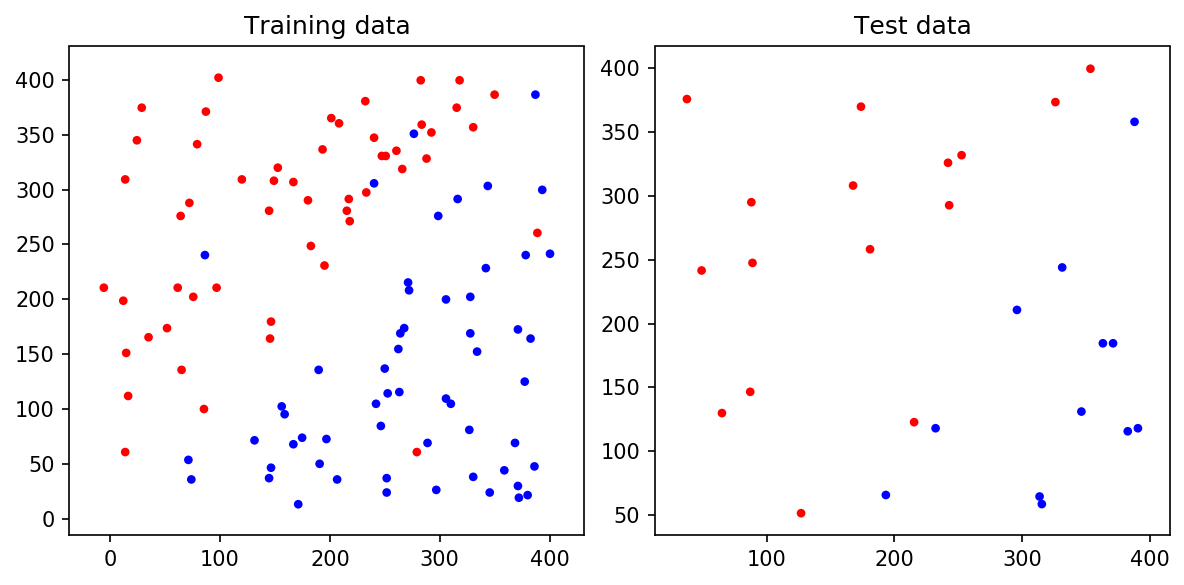

C : 0.1, g : 0.01


C:\Users\ddoyl\anaconda3\lib\site-packages\ipykernel_launcher.py:98: UserWarning: No contour levels were found within the data range.


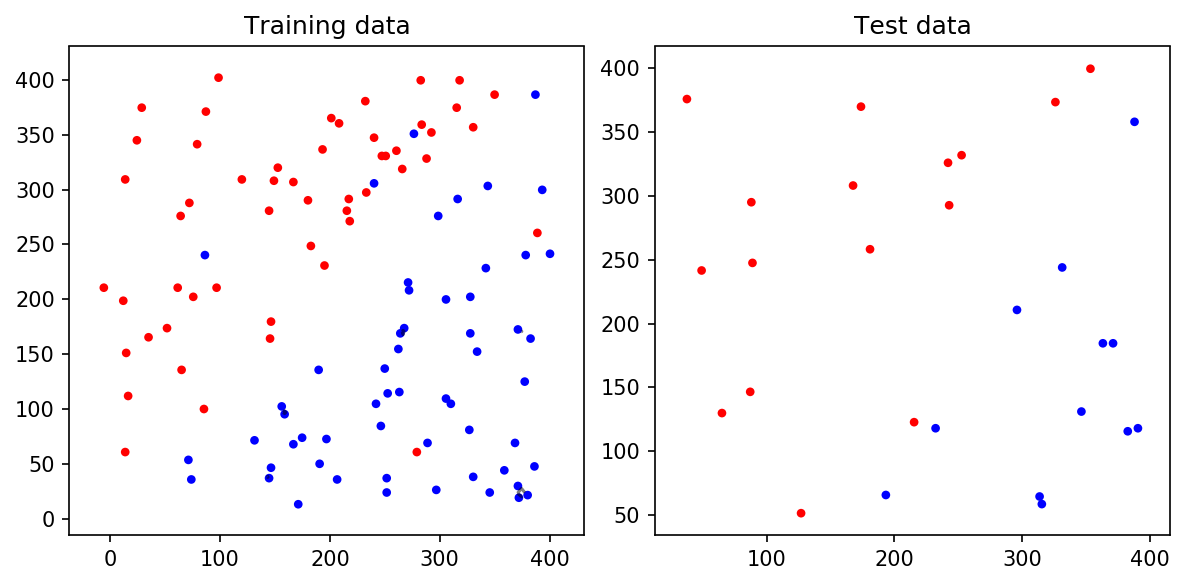

C : 0.1, g : 0.001


C:\Users\ddoyl\anaconda3\lib\site-packages\ipykernel_launcher.py:98: UserWarning: No contour levels were found within the data range.


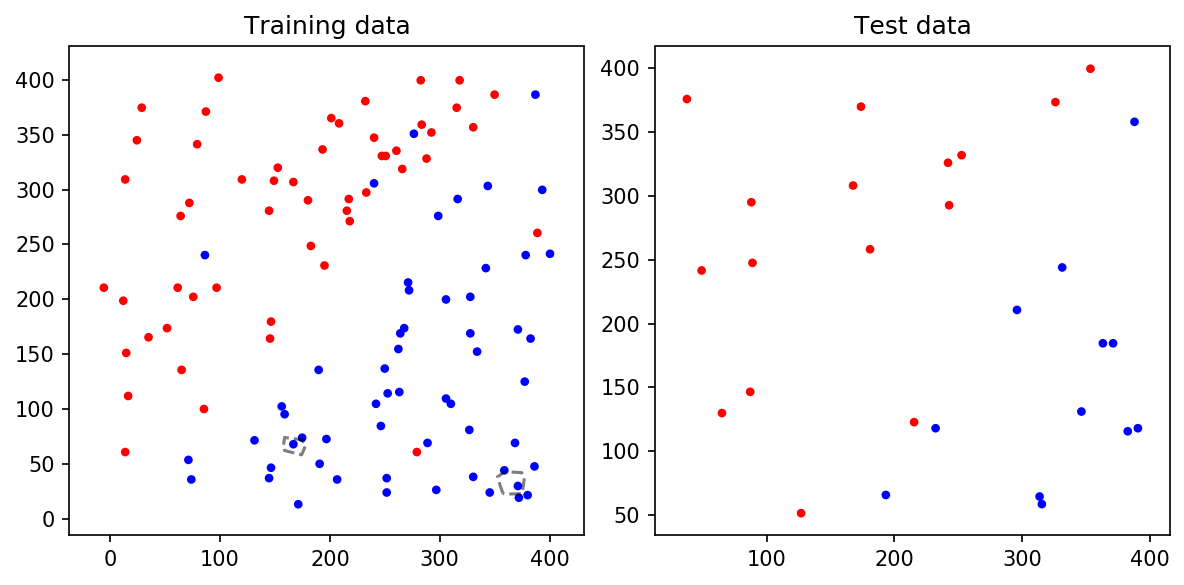

C : 0.1, g : 0.0001


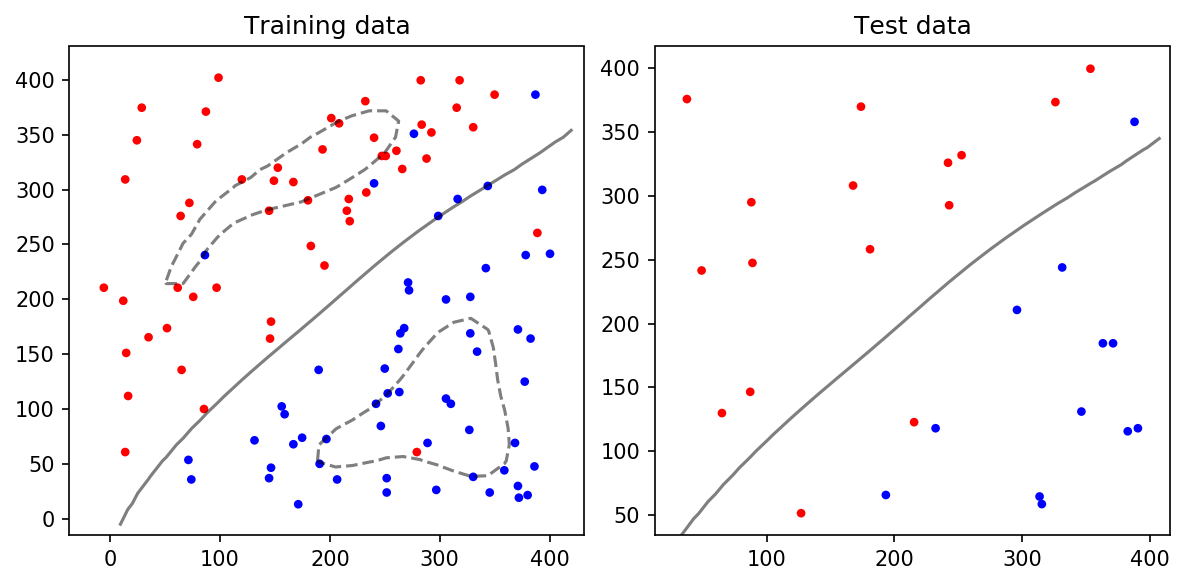

C : 0.1, g : 1e-05


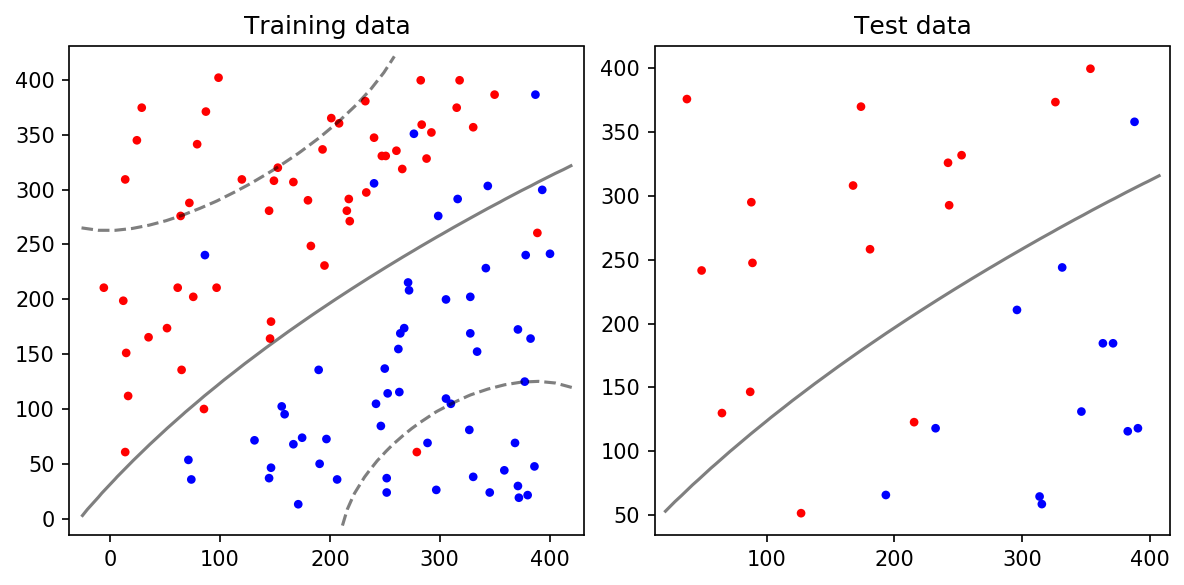

C : 1, g : 0.1


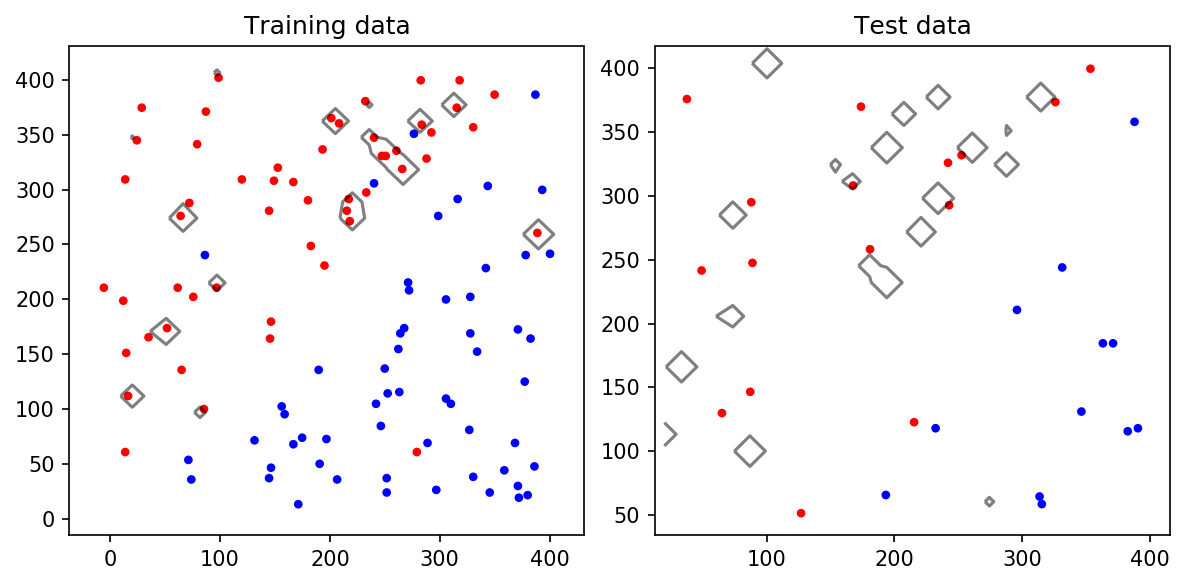

C : 1, g : 0.01


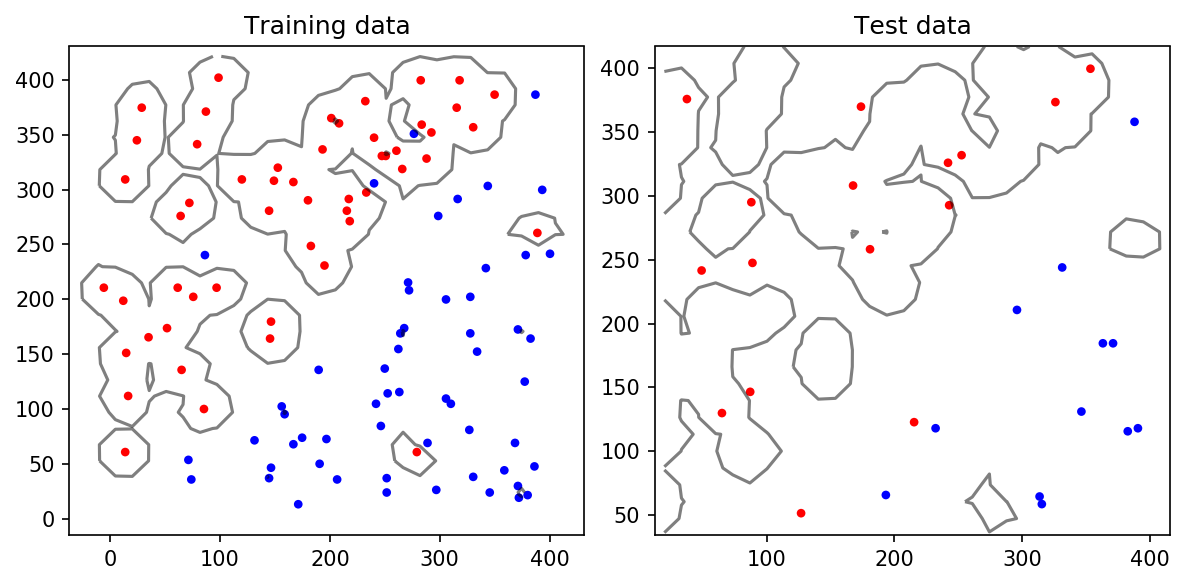

C : 1, g : 0.001


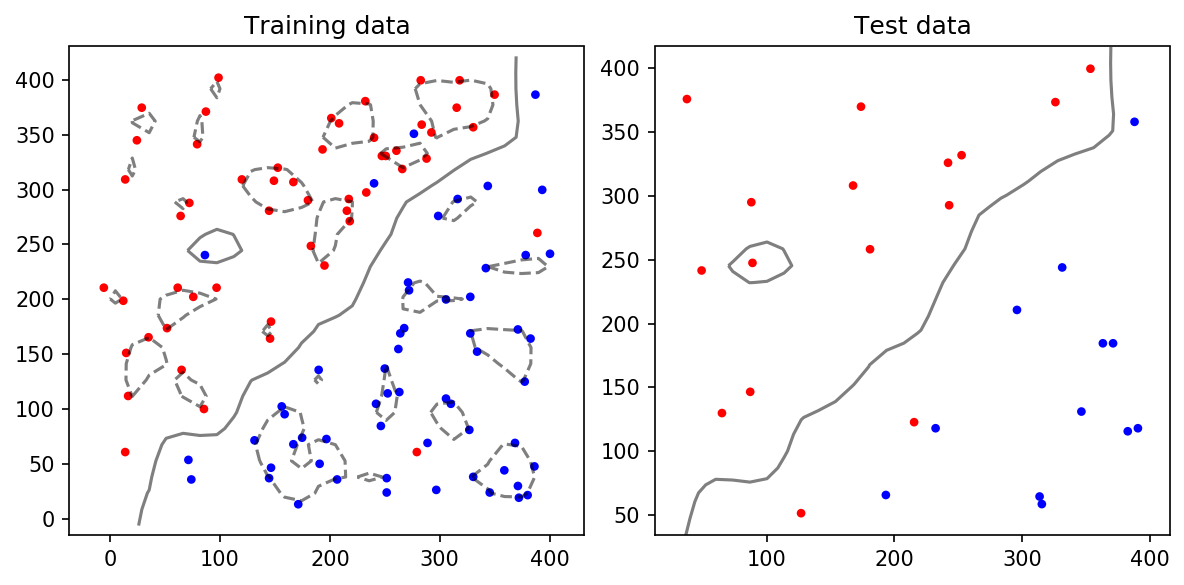

C : 1, g : 0.0001


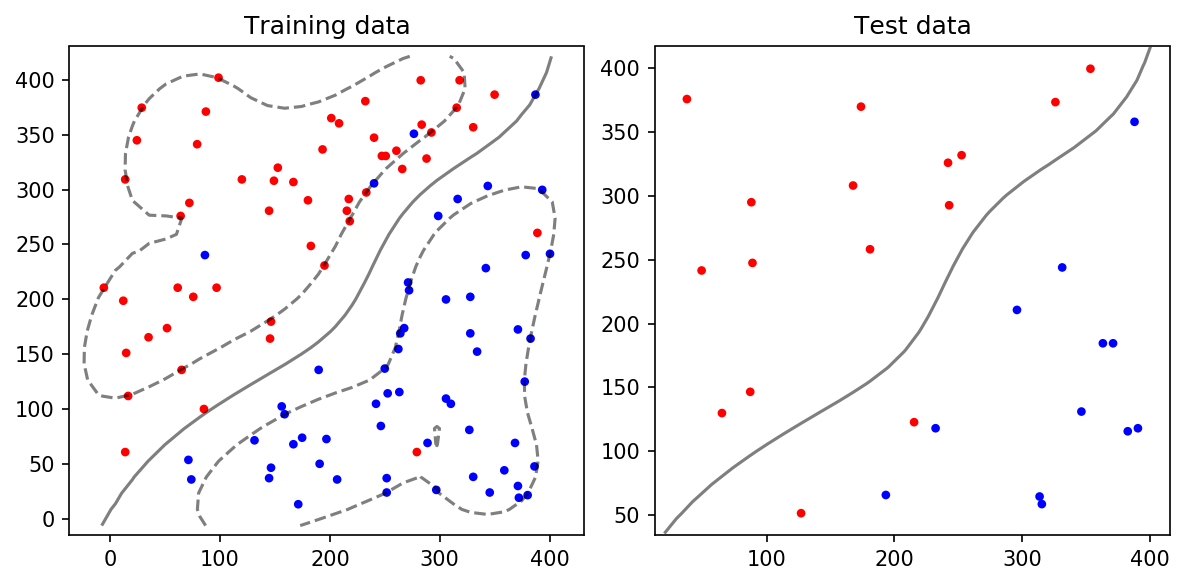

C : 1, g : 1e-05


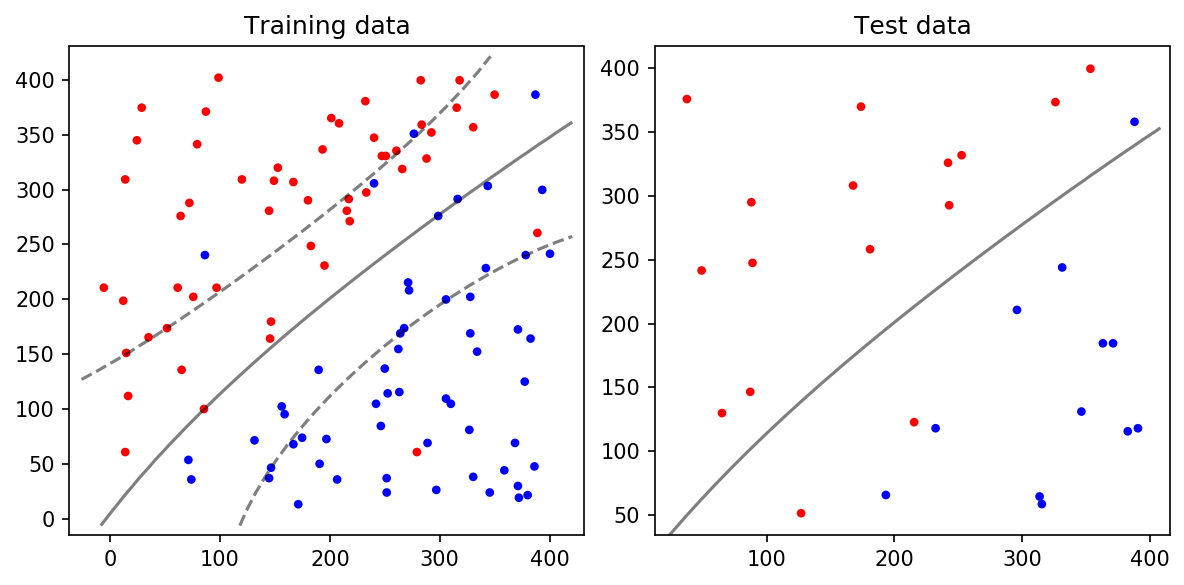

C : 10, g : 0.1


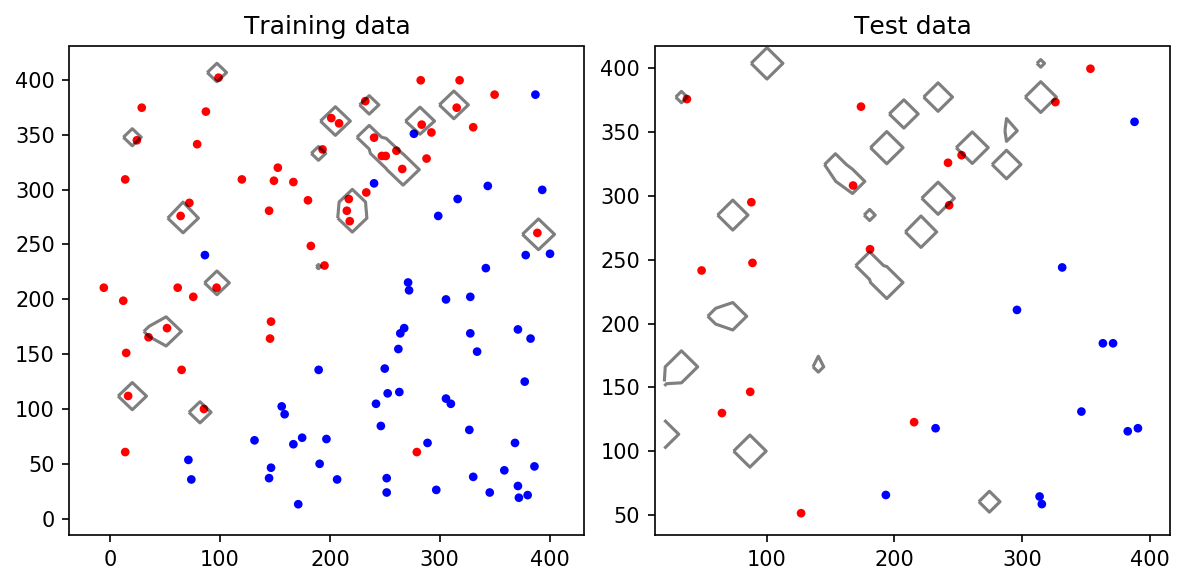

C : 10, g : 0.01


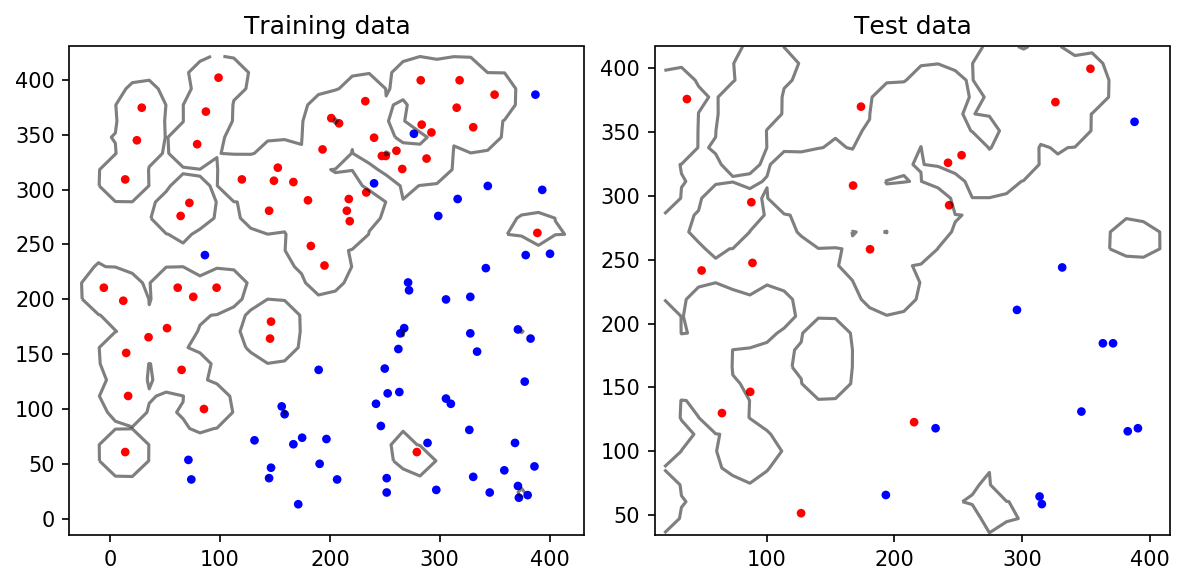

C : 10, g : 0.001


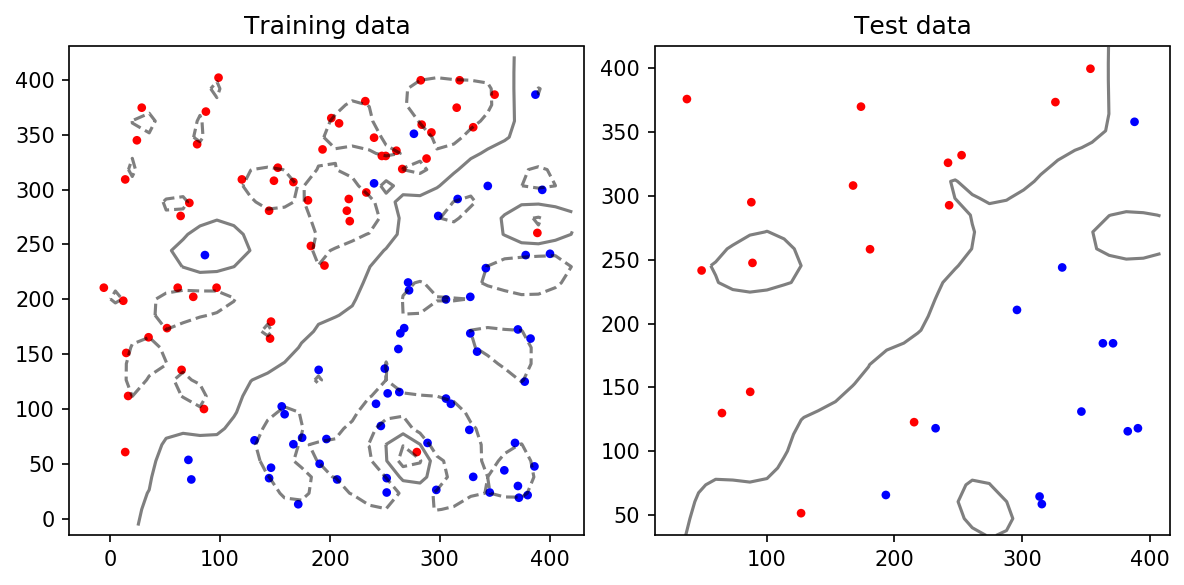

C : 10, g : 0.0001


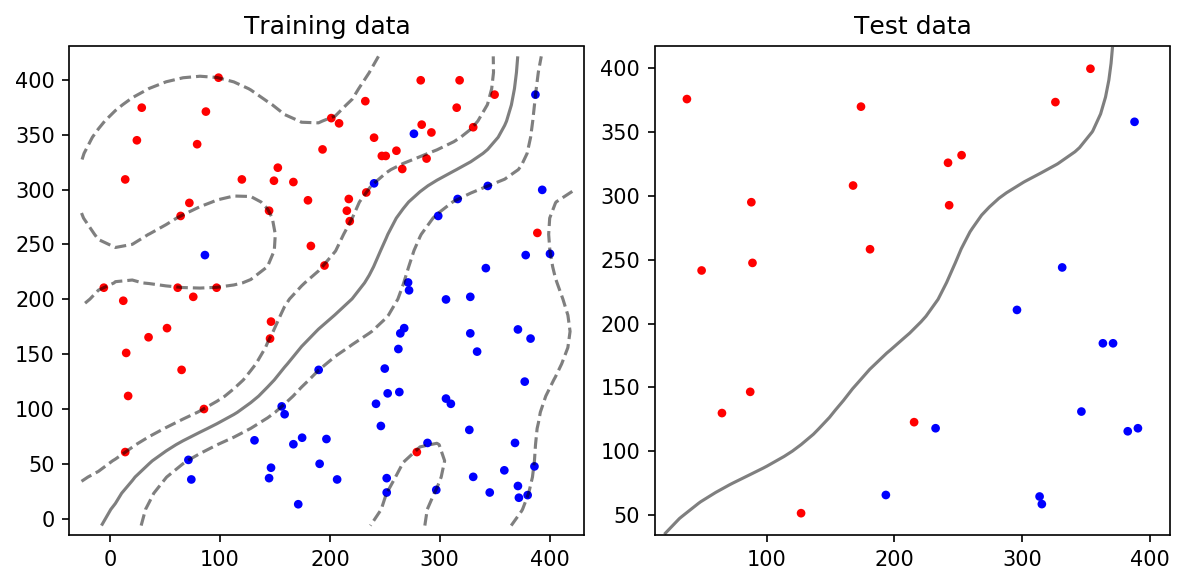

C : 10, g : 1e-05


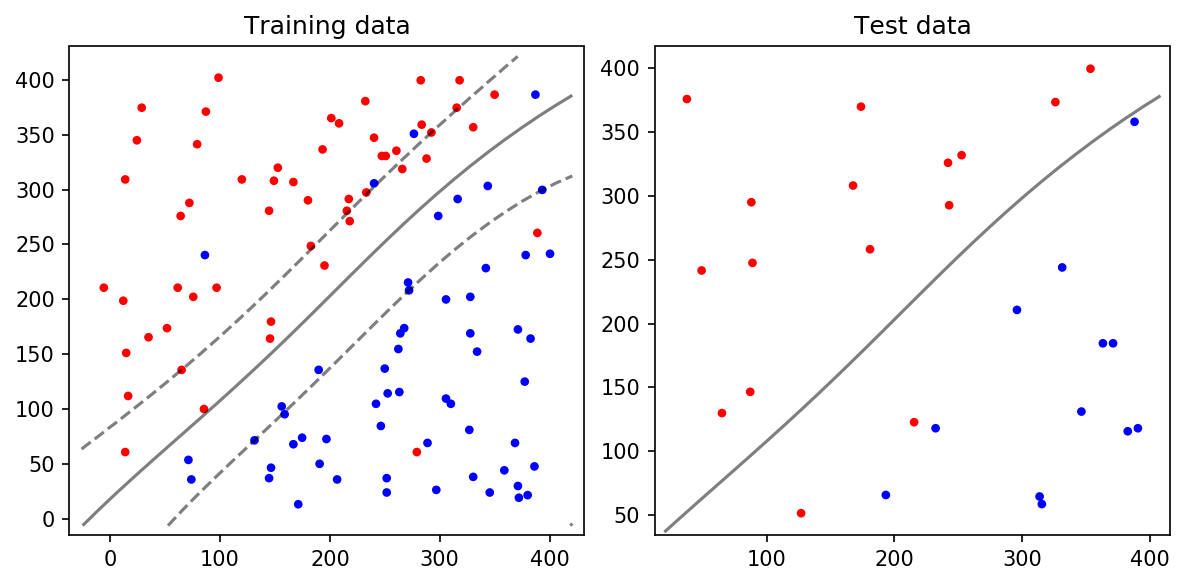

In [10]:
C = [0.1, 1, 10]
g = [0.1, 0.01, 0.001, 0.0001, 0.00001]

for cc in C:
    for gg in g:
        model = svm.SVC(kernel='rbf', C=cc, gamma=gg)
        model.fit(X_train, y_train)
        
        print('C : {}, g : {}'.format(cc, gg))
        plot_decision_function(X_train, y_train, X_test, y_test, model)

## kernel function

## RBF(가우스 커널)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.2s finished


Best Parameters:
 {'C': 10, 'gamma': 1e-05}
Best Estimators:
 SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


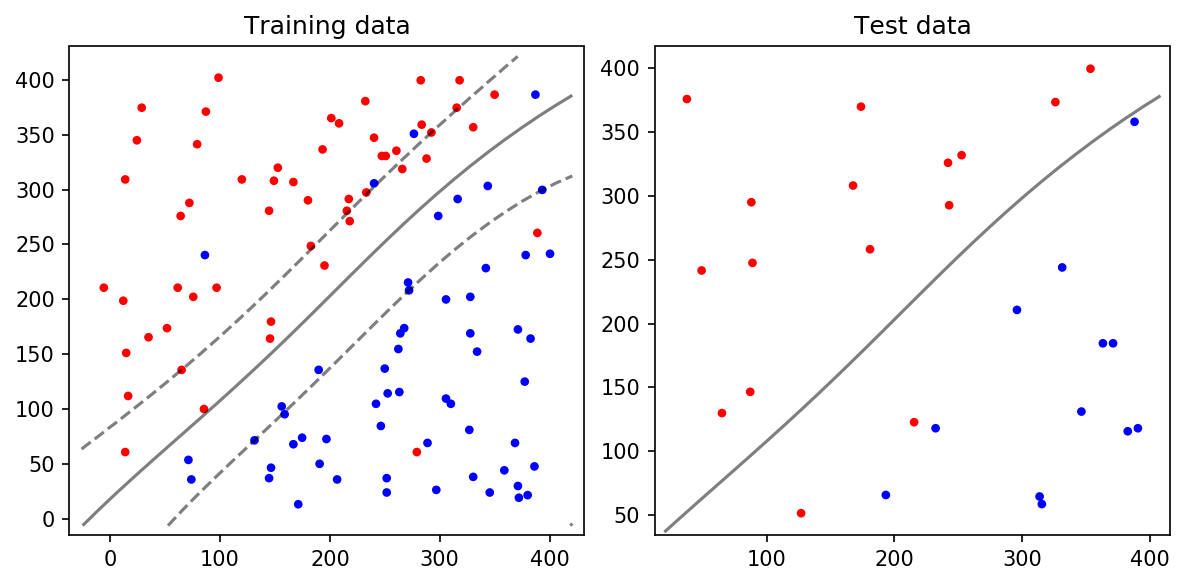

Accuracy: 93.0%


In [5]:
C = [0.1, 1, 10, 100]
g = [1, 0.1, 0.01, 0.001, 0.00001]
     
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10]}

clf_grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, verbose=1)

# Train the classifier
clf_grid.fit(X_train, y_train)

# clf = grid.best_estimator_()
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)

# Plot decision function on training and test data
plot_decision_function(X_train, y_train, X_test, y_test, clf_grid)
print("Accuracy: {}%".format(round(clf_grid.score(X_test, y_test) * 100 )))

## Poly(다항식 커널)

In [ ]:
C = [0.1, 1, 10]
g = [0.1, 0.01, 0.001, 0.0001, 0.00001]

for cc in C:
    for gg in g:
        model = svm.SVC(kernel='rbf', C=cc, gamma=gg)
        model.fit(X_train, y_train)
        
        print('C : {}, g : {}'.format(cc, gg))
        plot_decision_function(X_train, y_train, X_test, y_test, model)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters:
 {'C': 10, 'degree': 3, 'gamma': 1e-05}
Best Estimators:
 SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


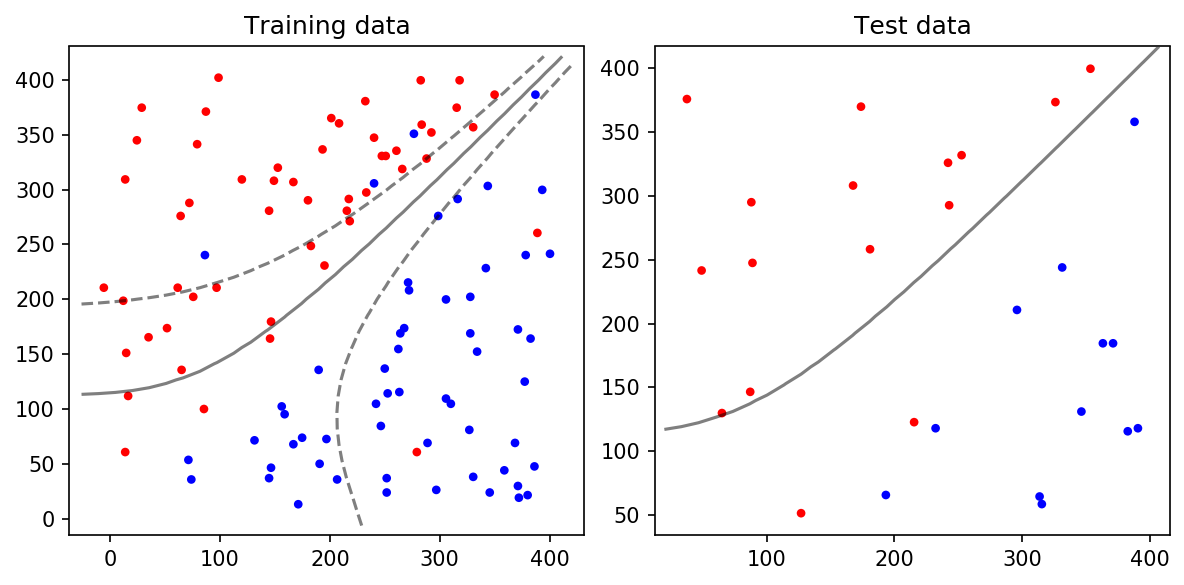

Accuracy: 93.0%


In [19]:
param_grid = {'C': [10], 'gamma': [0.00001], 'degree' : [3]}

clf_grid = GridSearchCV(svm.SVC(kernel='poly'), param_grid, verbose=1)

# Train the classifier
clf_grid.fit(X_train, y_train)

# clf = grid.best_estimator_()
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)

# Plot decision function on training and test data
plot_decision_function(X_train, y_train, X_test, y_test, clf_grid)
print("Accuracy: {}%".format(round(clf_grid.score(X_test, y_test) * 100 )))

C : 0.1, d : 2


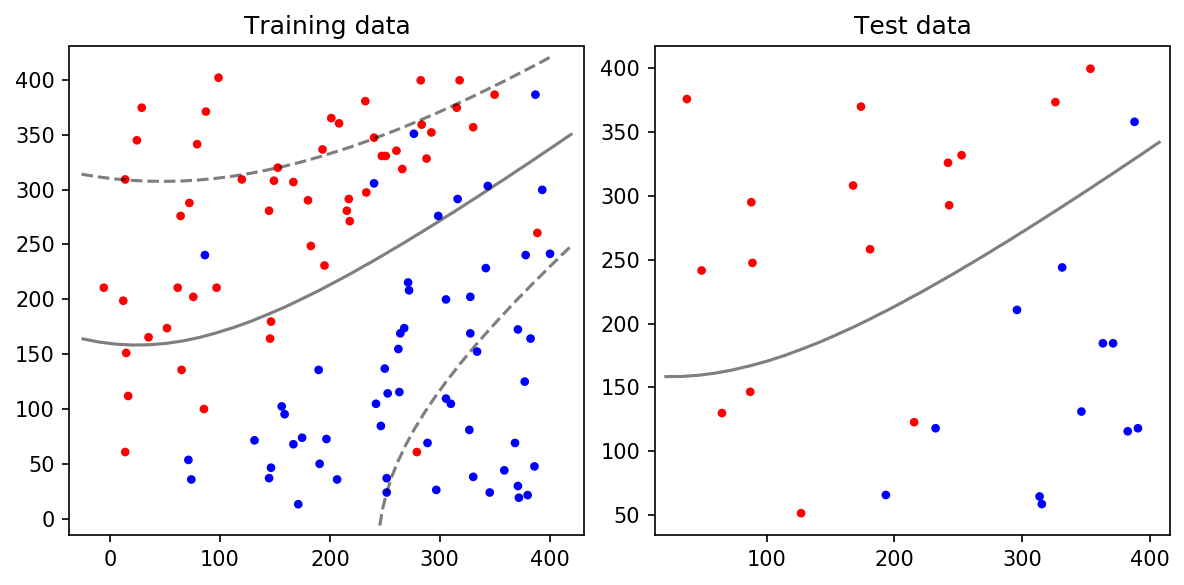

C : 0.1, d : 3


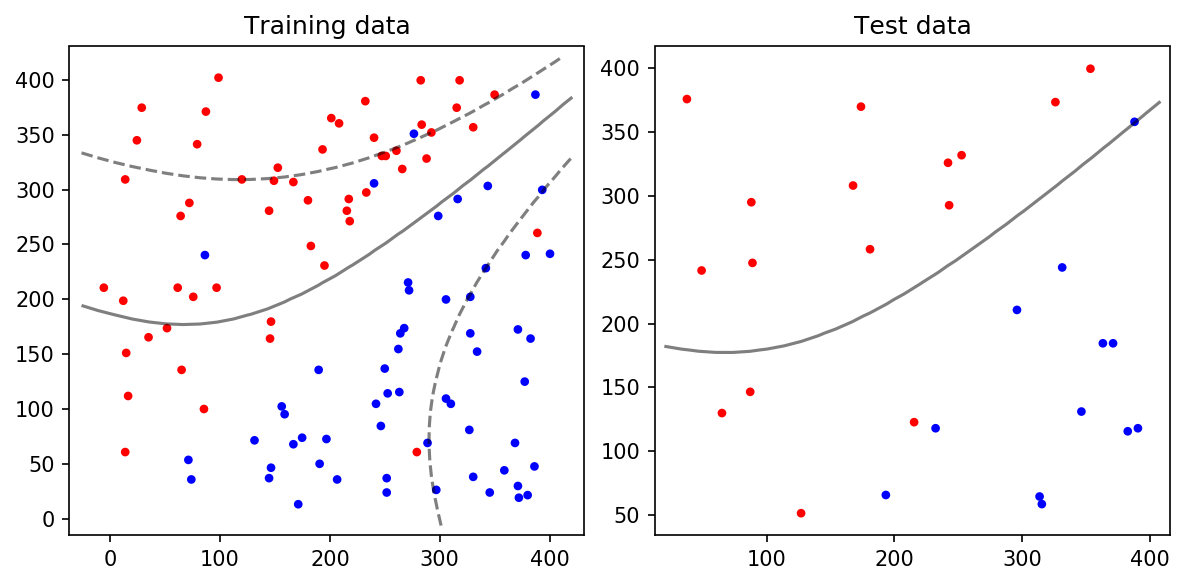

C : 0.1, d : 4


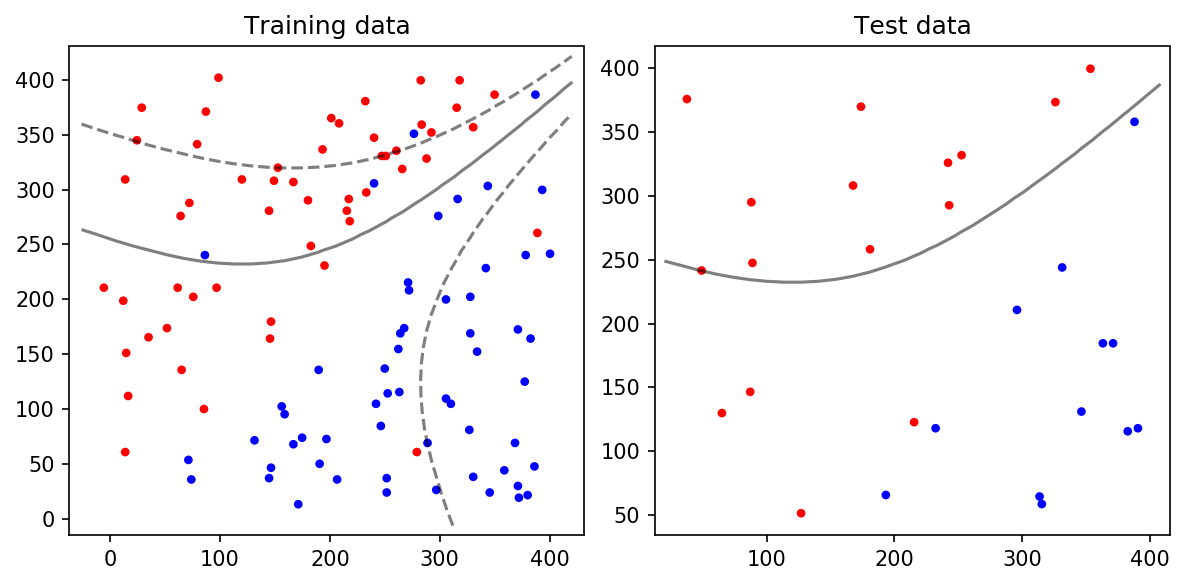

C : 1, d : 2


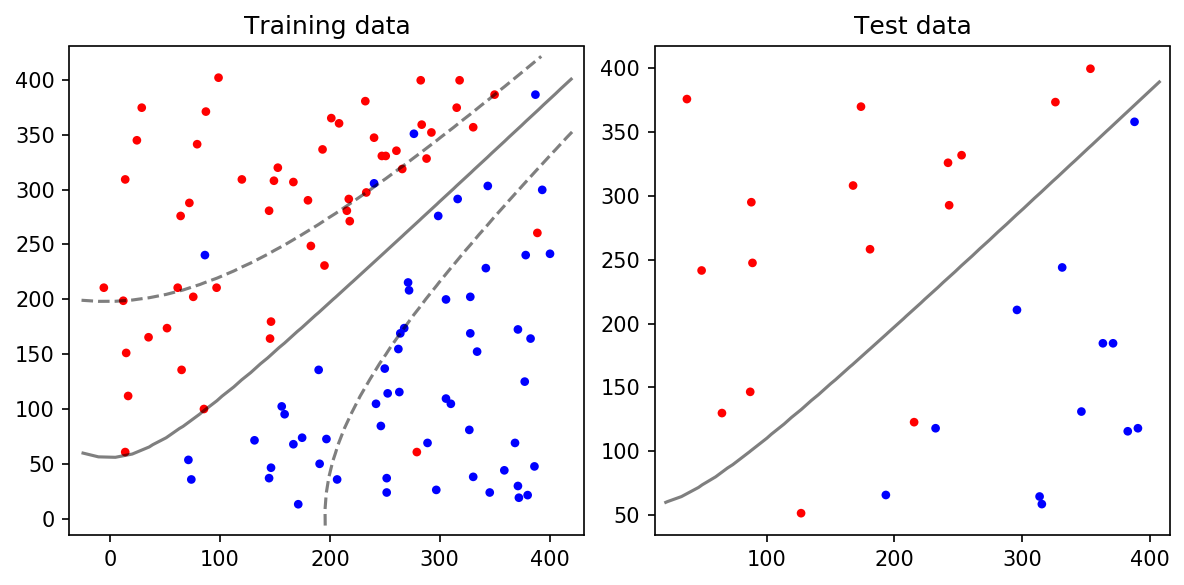

C : 1, d : 3


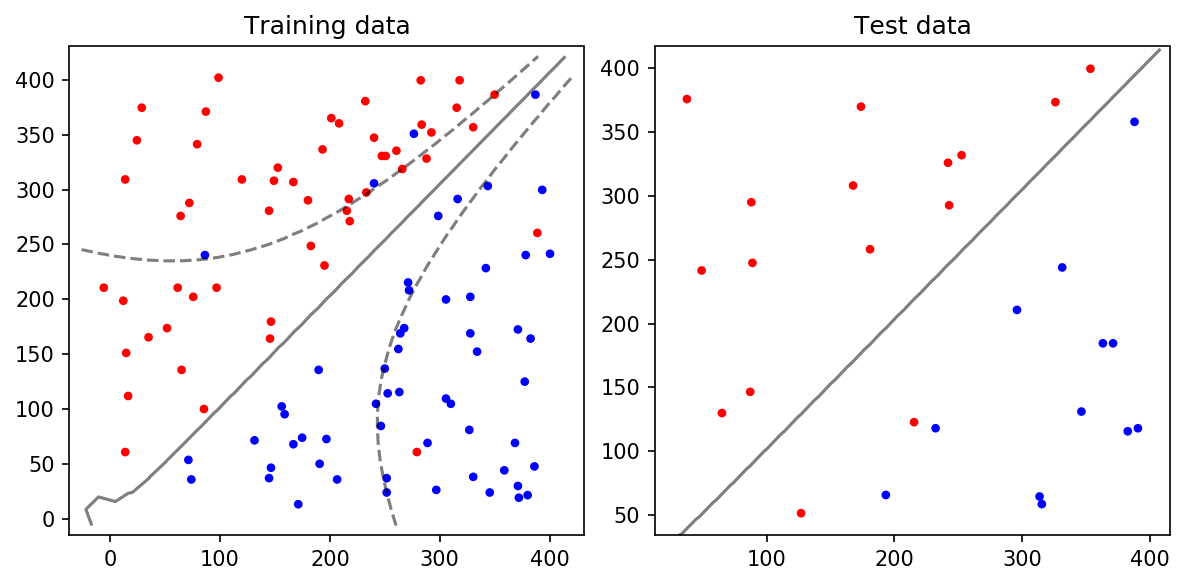

C : 1, d : 4


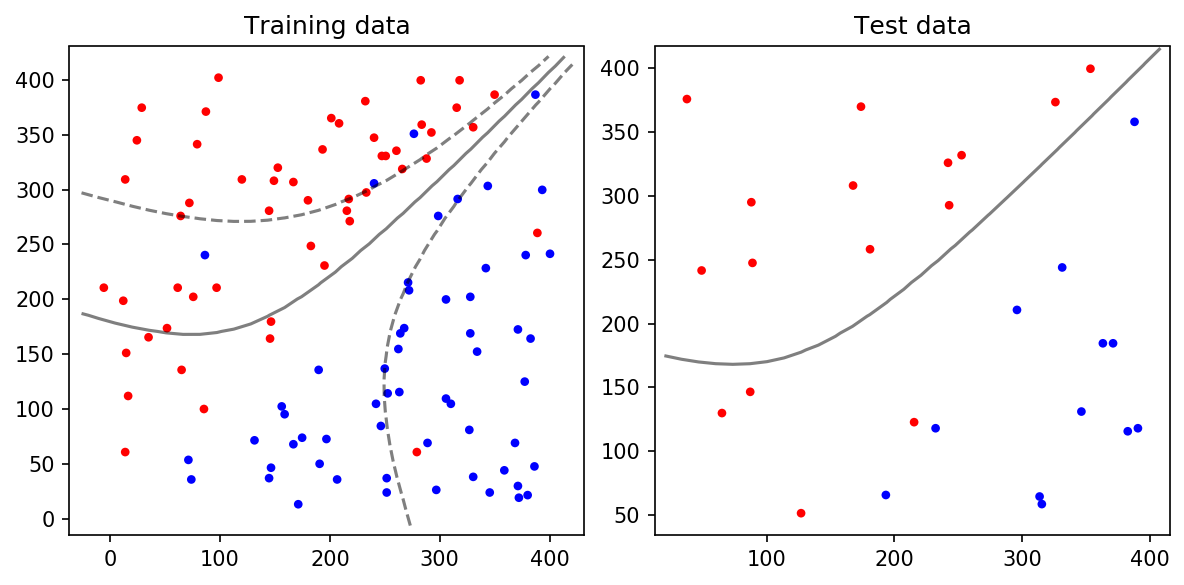

C : 10, d : 2


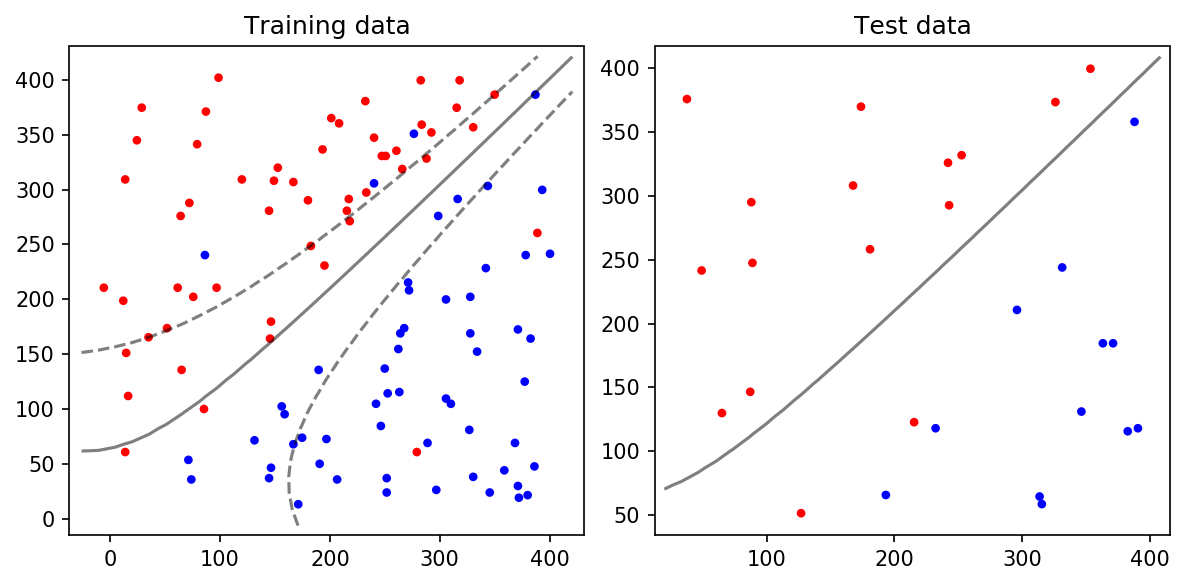

C : 10, d : 3


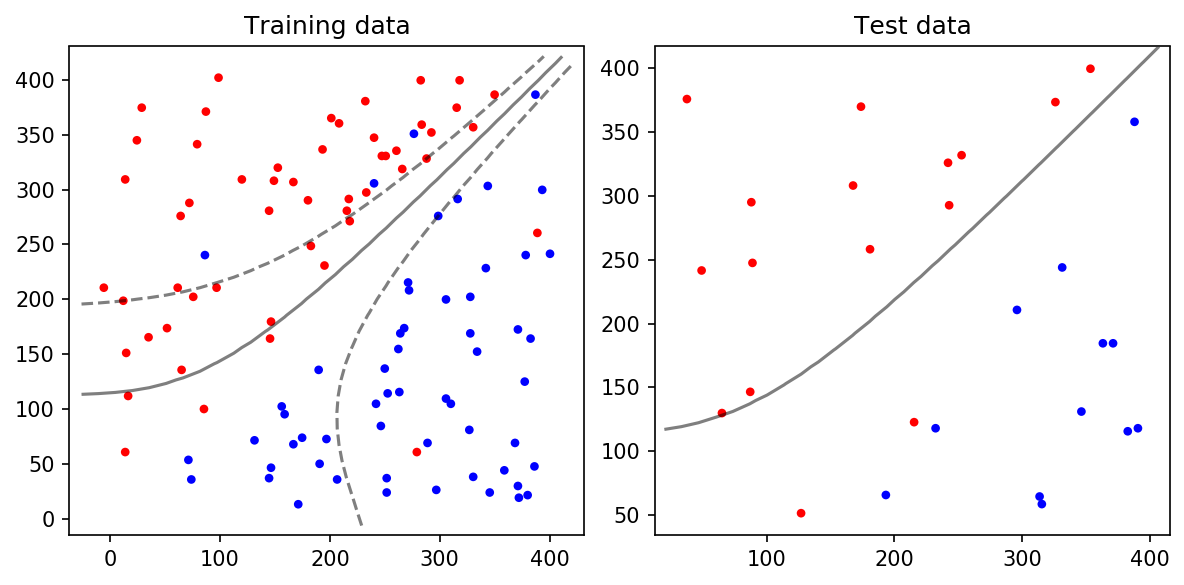

C : 10, d : 4


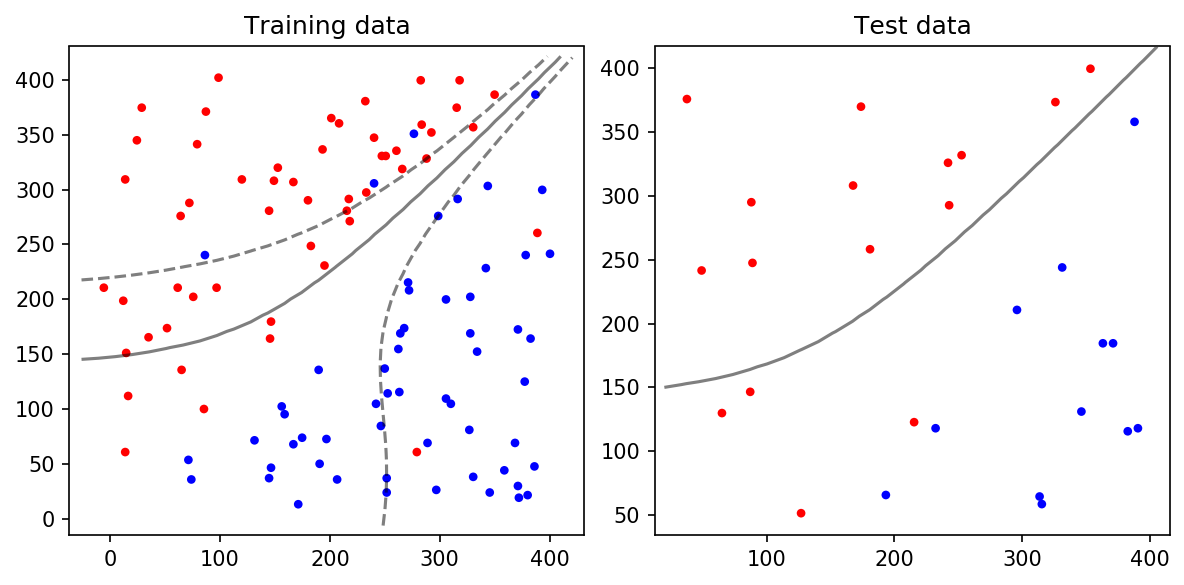

In [13]:
C = [0.1, 1, 10]
g = [0.1, 0.01, 0.001, 0.0001, 0.00001]
d = [2,3,4]

for cc in C:
    for dd in d:
        model = svm.SVC(kernel='poly', C=cc, gamma=0.00001, degree = dd)
        model.fit(X_train, y_train)
        
        print('C : {}, d : {}'.format(cc, dd))
        plot_decision_function(X_train, y_train, X_test, y_test, model)

## sigmoid

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters:
 {'C': 1, 'gamma': 1e-05}
Best Estimators:
 SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.1s finished


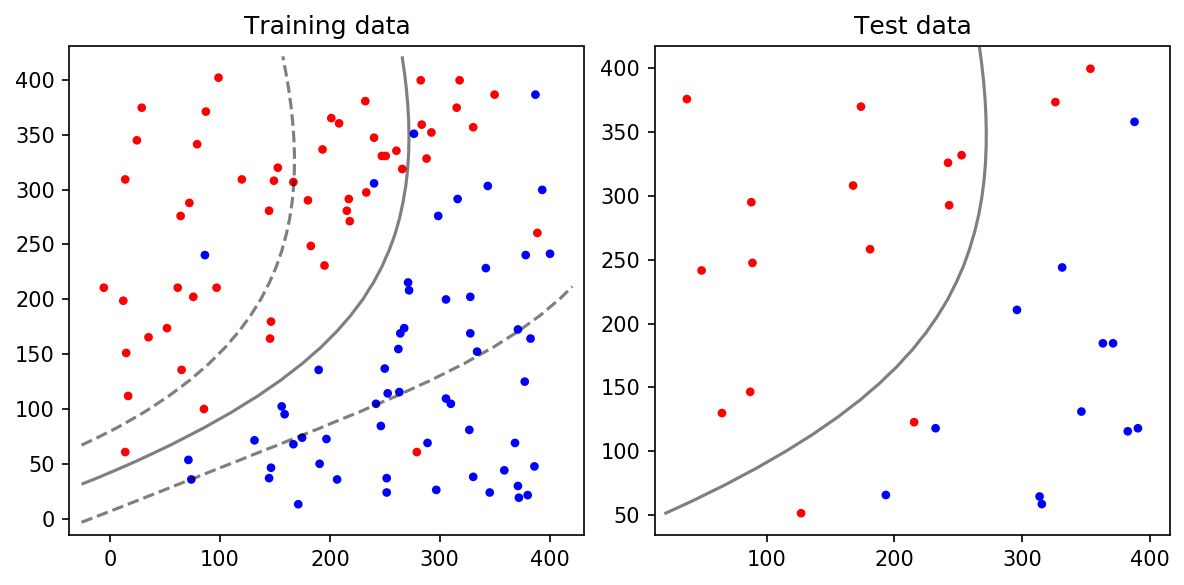

Accuracy: 86.0%


In [37]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.001, 0.0001, 0.00001]}

clf_grid = GridSearchCV(svm.SVC(kernel='sigmoid'), param_grid, verbose=1)

# Train the classifier
clf_grid.fit(X_train, y_train)

# clf = grid.best_estimator_()
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)

# Plot decision function on training and test data
plot_decision_function(X_train, y_train, X_test, y_test, clf_grid)
print("Accuracy: {}%".format(round(clf_grid.score(X_test, y_test) * 100 )))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters:
 {'C': 1, 'gamma': 0.0001}
Best Estimators:
 SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished


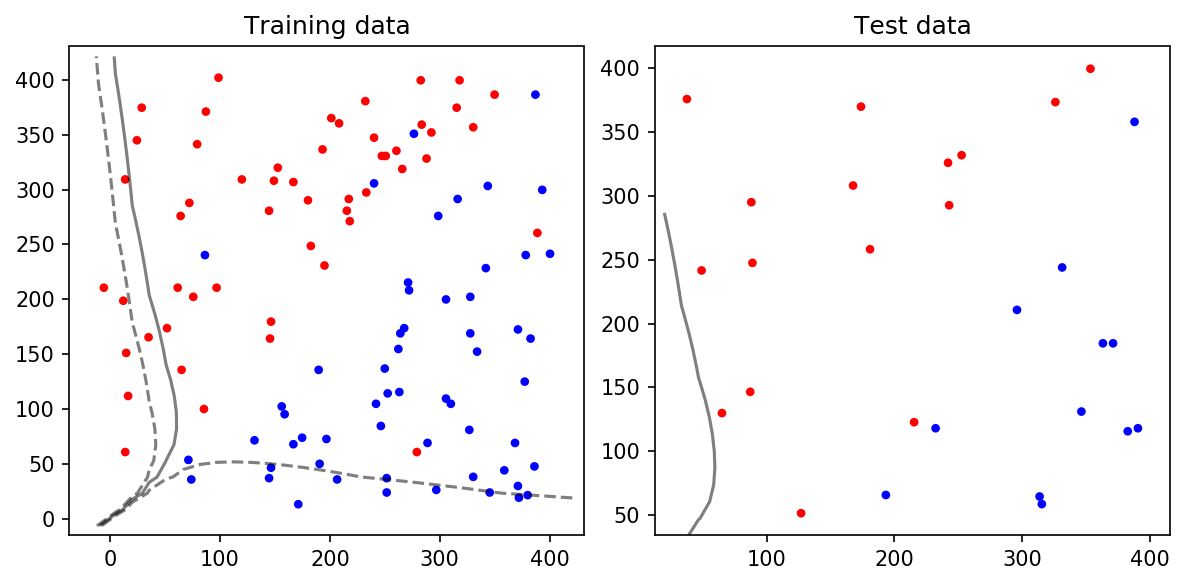

Accuracy: 43.0%


In [38]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.001, 0.0001]}

clf_grid = GridSearchCV(svm.SVC(kernel='sigmoid'), param_grid, verbose=1)

# Train the classifier
clf_grid.fit(X_train, y_train)

# clf = grid.best_estimator_()
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)

# Plot decision function on training and test data
plot_decision_function(X_train, y_train, X_test, y_test, clf_grid)
print("Accuracy: {}%".format(round(clf_grid.score(X_test, y_test) * 100 )))